In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflow'

In [19]:
boston = tf.keras.datasets.boston_housing

In [20]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [21]:
boston_data = boston.load_data()

In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)

In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [24]:
scaler = StandardScaler()

In [28]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [67]:
# Import necessary modules for the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the Deep Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

In [56]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(x_train_scaled, y_train_scaled, validation_split=0.2, epochs=100, verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(x_test_scaled, y_test_scaled, verbose=0)
print(f"Test MAE: {mae}")

# Predict on the test set
y_pred_scaled = model.predict(x_test_scaled)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.3677 - mae: 0.9144 - val_loss: 0.8831 - val_mae: 0.7231
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6125 - mae: 0.5988 - val_loss: 0.5419 - val_mae: 0.5515
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3321 - mae: 0.4128 - val_loss: 0.3784 - val_mae: 0.4429
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2383 - mae: 0.3243 - val_loss: 0.3044 - val_mae: 0.3916
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2238 - mae: 0.2863 - val_loss: 0.2667 - val_mae: 0.3827
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2185 - mae: 0.2954 - val_loss: 0.2396 - val_mae: 0.3610
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1740 - mae: 0.2627 - val_loss: 0.2083 - val_mae: 0.3375
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1732 - mae: 0.2585 - val_loss: 0.1958 - val_mae: 0.3244
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 

In [57]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)

In [59]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [61]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 36.2300 - mae: 4.3166 - val_loss: 38.1918 - val_mae: 4.1469
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.5581 - mae: 5.0925 - val_loss: 37.3306 - val_mae: 4.0692
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.0690 - mae: 4.5087 - val_loss: 38.9896 - val_mae: 4.5960
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.9374 - mae: 4.9429 - val_loss: 45.9372 - val_mae: 4.5565
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37.0174 - mae: 4.4147 - val_loss: 40.9403 - val_mae: 4.8200
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38.7369 - mae: 4.7790 - val_loss: 36.2570 - val_mae: 4.0527
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37.3436 - mae: 4.5582 - val_loss: 41.9986 - val_mae: 4.9371
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34.3163 - mae: 4.4886 - val_loss: 35.2019 - val_mae: 4.0159
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - los

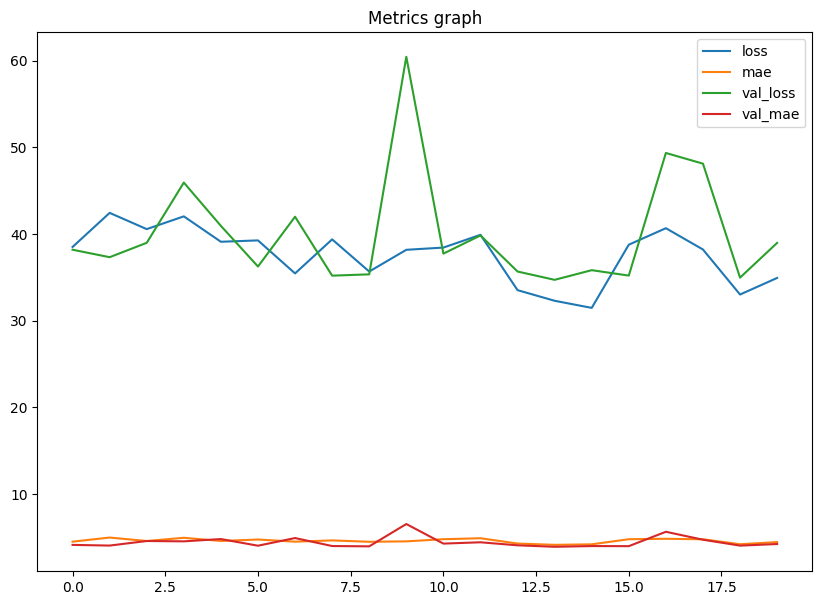

In [62]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [63]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


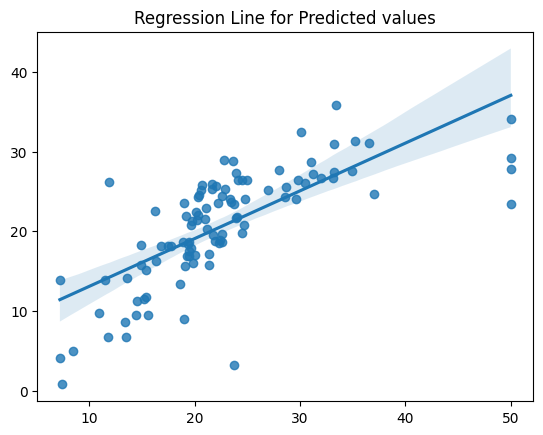

In [64]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [65]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [66]:
regression_metrics_display(y_test, y_pred)

MAE is 4.247666311264038
MSE is 38.97783458294843
R2 score is 0.4525739703422804
